In [29]:
"""
Created on Aug 4 2021

@author: rodrigo pena
"""

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['savefig.dpi'] = 120
from sklearn.metrics import classification_report

torch.manual_seed(0)

In [21]:
'''load the cross-correlation data from the simulation and the labels'''

data_cxy = np.loadtxt('crss.dat').astype(np.float32)
label_cxy = np.loadtxt('lbs.dat').astype(np.float32)
data_cxy = torch.from_numpy(data_cxy)
label_cxy = torch.from_numpy(label_cxy)

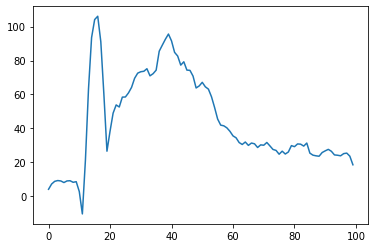

In [22]:
plt.plot(data_cxy[2])

In [23]:
class SoftMax(nn.Module):
    
    def __init__(self,input_size,output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size,output_size)
            
    def forward(self,x):
        z = self.linear(x)
        return z

In [24]:
input_dim = 100
output_dim = 3
learning_rate=0.01

model = SoftMax(input_dim,output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()
print("Print the model:\n ", model)

Print the model:
  SoftMax(
  (linear): Linear(in_features=100, out_features=3, bias=True)
)


In [25]:
# Print the parameters

print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

W:  torch.Size([3, 100])
b:  torch.Size([3])


In [26]:
my_data_train = []
my_data_val = []
for i in range(len(data_cxy)):
    if i < len(data_cxy)/2:
        my_data_train.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])
    else:    
        my_data_val.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])

train_set = torch.utils.data.DataLoader(dataset=my_data_train,batch_size=10)
val_set = torch.utils.data.DataLoader(dataset=my_data_val,batch_size=10)
# train_set, val_set = torch.utils.data.random_split(my_data, [800, 800])


In [65]:
yhat

tensor([0, 0, 2,  ..., 0, 0, 0])

In [27]:
loss_list = []
accuracy_list = []
N_test = len(my_data_val)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x,y in train_set:
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z,y)
            loss.backward()
            optimizer.step()
            
        correct = 0
        for x_test, y_test in val_set:
            z = model(x_test)
            _, yhat = torch.max(z.data,1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)
train_model(1000)

(-1.0, 300.0)

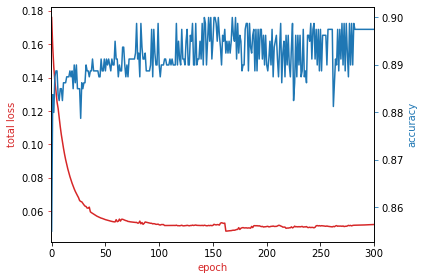

In [28]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()
plt.xlim([-1,300])

In [ ]:
print(classification_report(results['Expected'], results['Predicted']))

In [66]:
_, pred_results = torch.max(model(data_cxy),1)
pred_results = pred_results.numpy()

In [69]:
expc_results = label_cxy.numpy()

array([0, 0, 2, ..., 0, 0, 0])

- Precision: Accuracy of positive predictions
Precision = TP/(TP + FP)
- Recall: Fraction of positives that were correctly predicted
Recall = TP/(TP+FN)
- F1 score: Harmonic mean of the model's precision and recall
F1 score = 2*(Recall * precision)/(recall + precision)

In [75]:
print(classification_report(label_cxy.numpy(),pred_results.numpy()))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1200
         1.0       0.97      0.72      0.83       200
         2.0       0.98      0.67      0.79       200

   micro avg       0.92      0.92      0.92      1600
   macro avg       0.95      0.79      0.86      1600
weighted avg       0.93      0.92      0.92      1600

